In [1]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import signalgenerator as sg

In [2]:
f1 = 5.25
f2 = 5.25
a1 = 128
a2 = 153
dT = 0.01
data_points = 300
timesteps = [i*dT for i in range(data_points)]
real_freq = [f1]*data_points

simulated_signal, frequencies = sg.complexSignal(f1, f2, a1, a2, data_points = data_points)

In [3]:
from flcfilters import FLC, WFLC, BMFLC, EBMFLC, BMWFLC

# WFLC

In [4]:
wflc = WFLC(n=1,mu=0.4,mu0=0.000000001 ,f0=4.5)
estimated_signal = []
estimated_freq = []
time = 0.00
time_step = 0.01

for i in range(len(simulated_signal)):
    SIG = simulated_signal[i]
    est = wflc.WFLC(time, SIG)
    estimated_signal.append(est)
    estimated_freq.append(wflc.estimatedFrequency)
    time += time_step

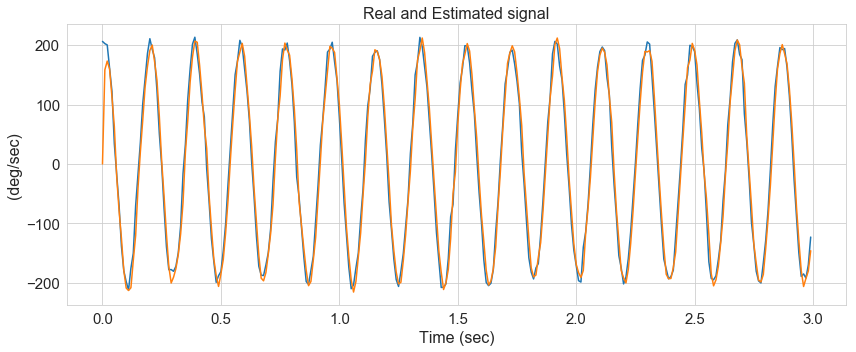

In [5]:
timesteps = [i*0.01 for i in range(len(estimated_signal))]
# plot signal
plt.figure(figsize=(12, 5))
plt.title("Real and Estimated signal", size = 16)
plt.ylabel("(deg/sec)", size = 16)
plt.xlabel("Time (sec)", size = 16)
plt.xticks(size=15)
plt.yticks(size=15)
plt.plot(timesteps, simulated_signal)
plt.plot(timesteps, estimated_signal)
plt.tight_layout()
plt.show()

In [6]:
print(estimated_freq[-1])

4.500171364828888


# BMFLC

In [7]:
bmflc = BMFLC(mu=0.01, fmin=3, fmax=9, dF=0.08)
estimated_signal = []
estimated_freq = []
time = 0.00
time_step = 0.01

for i in range(len(simulated_signal)):
    SIG = simulated_signal[i]
    est = bmflc.BMFLC(time, SIG)
    estimated_signal.append(est)
    estimated_freq.append(bmflc.estimatedFrequency)
    time += time_step

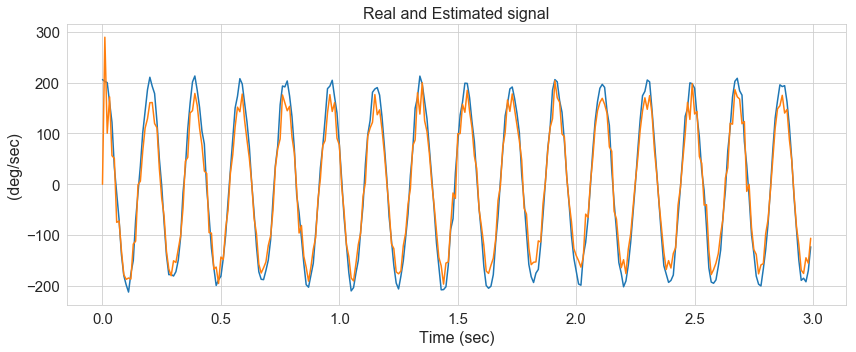

In [8]:
timesteps = [i*0.01 for i in range(len(estimated_signal))]
# plot signal
plt.figure(figsize=(12, 5))
plt.title("Real and Estimated signal", size = 16)
plt.ylabel("(deg/sec)", size = 16)
plt.xlabel("Time (sec)", size = 16)
plt.xticks(size=15)
plt.yticks(size=15)
plt.plot(timesteps, simulated_signal)
plt.plot(timesteps, estimated_signal)
plt.tight_layout()
plt.show()

In [9]:
print(estimated_freq[-1])

5.254331131148979


# EBMFLC

In [13]:
ebmflc = EBMFLC(mu=0.0012, fmin=0,fmax=20,fa=0 ,fb=2, fc=4, fd=8, dF=0.03, dT=0.01, Tp = 2, alpha = 0.05)
estimated_signal = []
estimated_freq = []
time = 0.00
time_step = 0.01

for i in range(len(simulated_signal)):
    SIG = simulated_signal[i]
    est = ebmflc.EBMFLC(time, SIG)
    estimated_signal.append(est)
    estimated_freq.append(ebmflc.estimatedFrequency)
    time += time_step

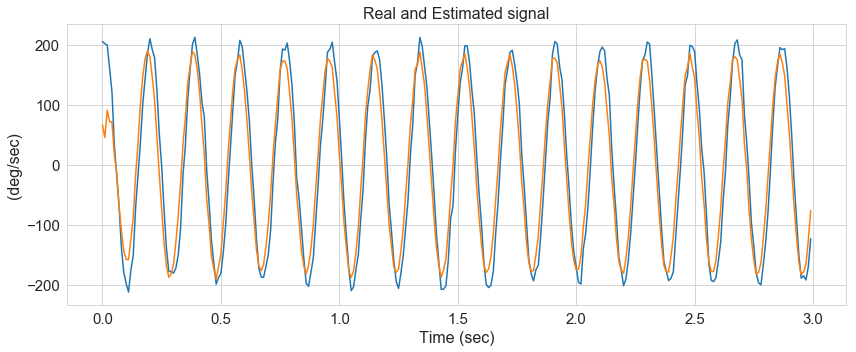

In [14]:
timesteps = [i*0.01 for i in range(len(estimated_signal))]
# plot signal
plt.figure(figsize=(12, 5))
plt.title("Real and Estimated signal", size = 16)
plt.ylabel("(deg/sec)", size = 16)
plt.xlabel("Time (sec)", size = 16)
plt.xticks(size=15)
plt.yticks(size=15)
plt.plot(timesteps, simulated_signal)
plt.plot(timesteps, estimated_signal)
plt.tight_layout()
plt.show()

In [15]:
print(estimated_freq[-1])

5.2823790689020464


# BMWFLC

In [89]:
import math
bmwflc = BMWFLC(mu=1.0, kappa = 0.01, g = 100,
                h = 0.00001,eta = 0.4 , f_min=3, f_max=9,
                dF=0.01, dT=0.01, Tp=2, alpha=0.67, beta=100,
                l=0.1, peaks_to_track = 2, adaptive_lr = True)

estimated_signal = []
estimated_freq = []
time = 0.00
time_step = 0.01

for i in range(len(simulated_signal)):
    SIG = simulated_signal[i]
    est = bmwflc.BMWFLC(time, SIG)
    estimated_signal.append(est)
    #estimated_freq.append(bmwflc.estimatedFrequency)
    time += time_step
    
    
if len(bmwflc.allPeaksSorted) > 1:
    print("Main:" + str(bmwflc.V[bmwflc.allPeaksSorted[0][0]] / (2 * math.pi)))
    print("Scondary:" + str(bmwflc.V[bmwflc.allPeaksSorted[1][0]] / (2 * math.pi)))

Main:5.248677960190732
Scondary:5.71933256013468


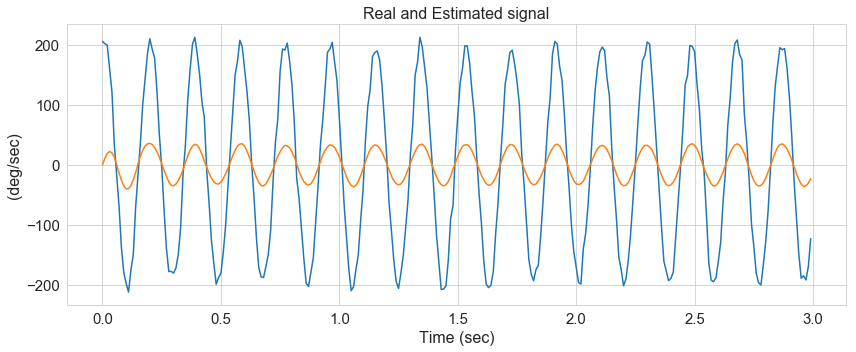

In [90]:
timesteps = [i*0.01 for i in range(len(estimated_signal))]
# plot signal
plt.figure(figsize=(12, 5))
plt.title("Real and Estimated signal", size = 16)
plt.ylabel("(deg/sec)", size = 16)
plt.xlabel("Time (sec)", size = 16)
plt.xticks(size=15)
plt.yticks(size=15)
plt.plot(timesteps, simulated_signal)
plt.plot(timesteps, estimated_signal)
plt.tight_layout()
plt.show()